<a href="https://colab.research.google.com/github/artigenius/portfolio/blob/main/winter_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сентимент анализ в python'е

# Содержание

1.   Что такое NLP?
2.   Что такое sentiment analysis?
3. Попробуем вместе?



# NLP

Обработка естественного языка (NLP) – это технология машинного обучения, которая дает компьютерам возможность интерпретировать, манипулировать и понимать человеческий язык.

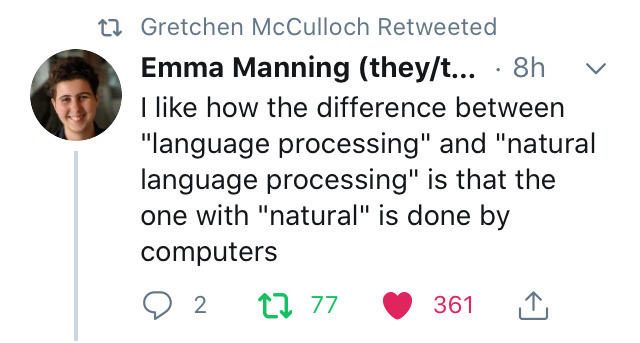

# Sentiment analysis

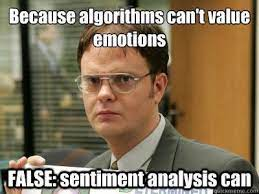

Анализ тональности текста (или сентимент-анализ) – одна из задач, с которыми работают специалисты Data Science. С помощью такого анализа можно изучить массив сообщений и иных данных и определить, как они эмоционально окрашены – позитивно, негативно или нейтрально.

In [ ]:
from textblob import TextBlob
class SentimentAnalyzer:
    def __init__(self):
      pass

    def analyze_sentiment(self, text):
      blob = TextBlob(text)
      sentiment_score = blob.sentiment.polarity
      return sentiment_score

    def classify_sentiment(self, sentiment_score):
      return "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

analyzer = SentimentAnalyzer()
sent_score = analyzer.analyze_sentiment(input())
class_score = analyzer.classify_sentiment(sent_score)
print(f'{sent_score} --> {class_score}')

KeyboardInterrupt: Interrupted by user

# Попробуем вместе!

Этот туториал вы можете повторять сами вслед за нами. Для этого сохраните файл коллаба на свой диск и следуйте инструкциям далее!

\


---


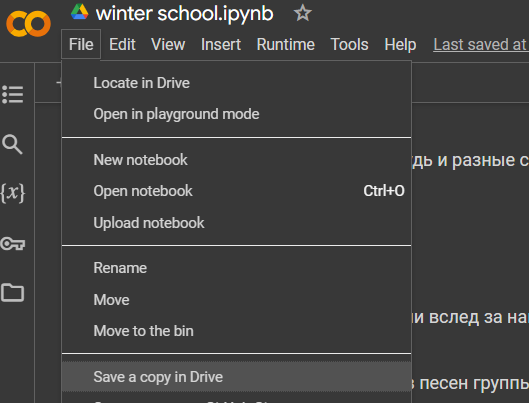

---

\

Мы проведем сентимент анализ текстов песен группы Backstreet boys.

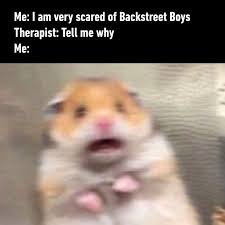

# 1 шаг



Загружаем необходимые [данные](https://docs.google.com/spreadsheets/d/1Qw7WthiH4D_5qvLaXEjxNWQC0sH2yOd9/edit?usp=sharing&ouid=108240662445422882418&rtpof=true&sd=true).

Перед нами таблица с текстовыми данными, в которой есть несколько столбцов:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# подключим коллаб к нашему диску для прямой загрузки любых данных

Mounted at /content/drive


Теперь нам необходимо загрузить библиотеку для обработки табличных данных.

In [ ]:
import pandas as pd

Откроем таблицу и посмотрим на то, как выглядят данные, и с чем нам придется работать.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/программирование /проект музыка/Backstreet_boys_lyrics.xlsx') # здесь прописываем путь к нашему файлу
df

Для проведения сентимент анализа некоторые колонки данных нам не нужны, поэтому мы можем спокойно от них избавиться.

In [ ]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Duration(minutes:seconds)'], axis=1)
df

Для дальнейшей работы с данными, мы должны понять, какой тип данных содержится в таблице. Всего есть несколько наиболее распространенных типов данных для датафрейма:
* *object* - Текстовые или смешанные числовые и нечисловые значения
* *int64* - Целые числа
* *float64* - Числа с плавающей точкой
* *datetime64* - Значения даты и времени
* *bool* - Значения True/False

In [ ]:
df.info()

# 2 шаг

Теперь, когда остались только нужные данные, перейдем к сентимент анализу.
Все, как обычно, начинается с импорта библиотек. Самая популярная библиотека для анализа текстовых данных nltk. В нее заранее включены модули для удаления стоп-слов, токенизации и лемматизации текста.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Стандартный порядок действий для предобработки текста это:
- удаление пунктуации
- удаление стоп-слов
- токенизация текста

In [ ]:
import string
def text_cleaned(text):
  text = text.str.replace('\n', ' ')
  text = text.str.replace('[{}]'.format(string.punctuation), ' ')
  text = text.str.lower()
  return text

# запишем очищенный текст в новую колонку lyrics_no_punkt
df.loc[:, 'Lyrics_no_punkt'] = text_cleaned(df.loc[:, 'Lyrics'])
df.head()

In [ ]:
def remove_stopwords(text):
    clean_text = list()
    nltk.download('punkt')
    nltk.download('stopwords')

    words =["yeah","ya"] # можно дополнить список
    ignore = (stopwords.words('english') + words)

    for i in text:
        words = nltk.word_tokenize(i) # токенизируем каждое слово в тектсе
        for element in ignore: # из токенизированного текста возвращаем список 'чистого текста'
            words = list(filter(lambda x: x!= element and len(x) > 1, words))
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

# применим функицю к колонке с текстом без пунктуации
df['Lyrics_cleaned'] = remove_stopwords(df['Lyrics_no_punkt'])
df.head()

Существует несколько способов проведения сентимент анализа:
- словарный (список эмоционально окрашенной лексики)
- статистический (обученная на размеченных текстах модель)
- смешанный (комбинация двух методов)

Мы будем использовать словарный, основанный на предсказании результата по сопоставлению данных со встроенной библиотекой.

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = [] # общий результат сентимент-анализа будет записан в этом списке
sentiment = [] # финальный "вердикт" анализа в другой колонке

for i in df.loc[:,'Lyrics_cleaned']:
    sentiment.append(sia.polarity_scores(i))

# 'Вердикт'(Compound) будет выноситься по сумме всех результатов и далее выровнен по среднему значению
df.loc[:,'Sent_scores'] = sentiment
df.loc[:,'Comp_score'] = df.loc[:,'Sent_scores'].apply(lambda x: x['compound'])
df.loc[:,'Sentiment'] = df.loc[:,'Comp_score'].apply(lambda x: 'Positive' if x>=0.5 else 'Negative' if x<=-0.5 else 'Neutral')
df.head()

Какую песню Backstreet Boys вы знаете? Давайте узнаем, какую оценку эмоциональнальности она получила :)

In [ ]:
df_filter = df ['Title']. isin (['Panic'])
df [df_filter]

Посмотрим, сколько позитивных, нейтральных и негативных песен есть в нашем датафрейме:

In [ ]:
#positive_most_common = df.loc[df['Sentiment'] == 'Positive'].value_counts().head(5)
count_positive = len(df[df["Sentiment"]=="Positive"])
count_neutral = len(df[df["Sentiment"]=="Neutral"])
count_negative = len(df[df["Sentiment"]=="Negative"])

print("Количество песен с оценкой :'Positive':")
print(count_positive)
print("Количество песен с оценкой :'Neutral':")
print(count_neutral)
print("Количество песен с оценкой :'Negative':")
print(count_negative)

Найдем самую "позитивную" песню по общему значению эмоциональности:

In [ ]:
most_pos=df.query('Comp_score == Comp_score.max()')
most_pos

Тем же образом найдем самую "негативную":

In [ ]:
most_neg=df.query('Comp_score == Comp_score.min()')
most_neg

Таким образом, мы получаем финальный ответ, какая песня является положительной\нейтральной\отрицательной.

\

---

\

Имея эти данные, мы можем сделать визуализацию. Этим и займемся!

# 3 шаг

Для питона существует несколько наиболее популярных библиотек, используемых для визуализации данных. Например, matplotlib, numpy, seaborn и другие. И, как и всегда, наш код начинается с установки библиотеки!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Построим диаграмму рассеивания для отображения конечного результата сентимент анализа по каждой песне и году ее выхода.

In [ ]:
plot=sns.scatterplot(data = df,
                x = 'Year of Release', y = 'Comp_score', hue='Sentiment'
                )
# подпишем названия всех осей и название графика, а также укажем шрифт подписи
plt.xlabel('Year of the song release', fontsize = 14)
plt.ylabel('Compound Sentiment Score', fontsize = 14)
plt.title('Sentiments in songs by year', fontsize = 16)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

Теперь попробуем изменить цвет данных, воспользуемся встроенной палитрой цветов:
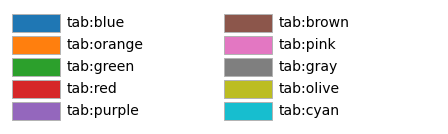

In [ ]:
# для того, чтобы наш график был красивым, создадим массив для каждой точки, который потом будет раскрашиваться
colors = {'Positive': 'pink', 'Neutral': 'gray', 'Negative': 'cyan'}
plot=sns.scatterplot(data = df,
                x = 'Year of Release', y = 'Comp_score', hue='Sentiment', palette = colors
                )
# подпишем названия всех осей и название графика, а также укажем шрифт подписи
plt.xlabel('Year of the song release', fontsize = 14)
plt.ylabel('Compound Sentiment Score', fontsize = 14)
plt.title('Sentiments in songs by year', fontsize = 16)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

Еще одно интересное применение визуализации - Облако слов.

In [ ]:
from wordcloud import WordCloud

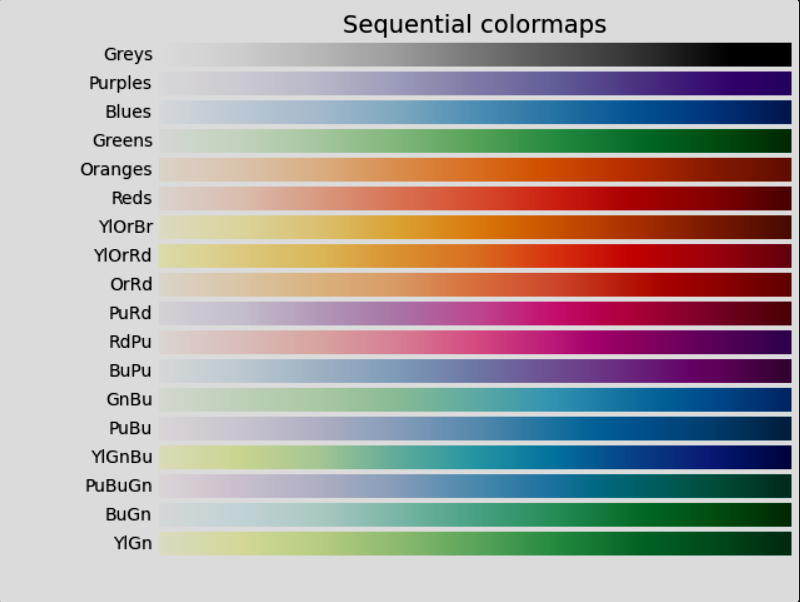

In [ ]:
# создадим два списка слов
pos_sent = df[df['Sentiment'] =='Positive'] # списк "позитивных" слов
neg_sent = df[df['Sentiment'] =='Negative'] # список "негативных" слов

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
wordcloud1 = WordCloud(collocations = False,
                      background_color = 'white',max_words = 100, colormap = 'OrRd', repeat = False,
                      width=3000, height=2000).generate(' '.join(pos_sent['Lyrics_cleaned']))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.subplot(1,2,2)
wordcloud2 = WordCloud(collocations = False,
                      background_color = 'white',max_words = 100, colormap = 'PuBuGn', repeat = False,
                      width=3000, height=2000).generate(' '.join(neg_sent['Lyrics_cleaned']))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

Для наглядности, самые частотные лексемы "позитивных" песен были выделены теплыми цветами, "негативных" - холодными.